<h1>Problem 1. Train a machine learning model using the training file to predict the values of the ‘Dataset’ column for the test file. ( Evaluation on the basis of Accuracy score)</h1>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

In [83]:
train_data=pd.read_csv('train.csv')
train_data.head()
#df=train_data.groupby('Dataset').describe()
#df.iloc[:,20:40]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [84]:
#....Handling Categorical data

#Mapping of Gender to int value (Male=1 and Female=0)

train_data['Gender']=train_data.Gender.map(dict(Male=1, Female=0))

In [85]:
#Handling NaN values

# train_data[train_data.isnull().values]
train_data.ffill(0,inplace=True)

In [86]:
#train_data.query('Dataset==2').reset_index()

In [87]:
train_data.shape

(466, 11)

In [88]:
train_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [89]:
#train_data.describe()

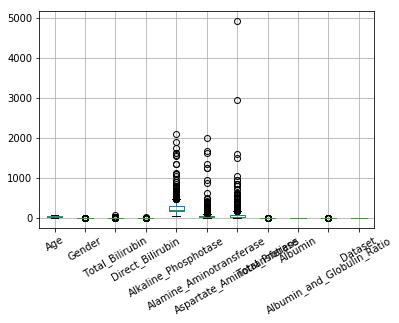

In [90]:
# Checking for outliers

train_data.boxplot()
plt.xticks(rotation=30)
plt.show()

In [91]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [92]:
test_data['Gender']=test_data.Gender.map(dict(Male=1, Female=0))

In [93]:
test_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [94]:
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


In [95]:
test_data.shape

(117, 10)

In [96]:
#train_data.columns

In [97]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
# Fetching the independent data

X=train_data.iloc[:,[0,1]] #77


In [99]:
# Fetching the target data

y=train_data['Dataset']
#y

In [100]:
# test_X=test_data.iloc[:,[0,1]]
# test_X.shape

In [101]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.20)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(372, 2)
(94, 2)
(372,)
(94,)


In [103]:
rand_forest=RandomForestClassifier()
rand_forest.fit(X_train,y_train)

C:\Users\PRACHI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
accuracy_score(rand_forest.predict(X_test),y_test)

0.7340425531914894

In [105]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
accuracy_score(dec_tree.predict(X_test),y_test)

0.776595744680851

In [107]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\PRACHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
accuracy_score(log_reg.predict(X_test),y_test)

0.776595744680851

In [109]:
test_X=test_data.iloc[:,[0,1]]
# test_X.shape

In [110]:
# dpred=dec_tree.predict(test_X)
# dpred

In [111]:
# pred=rand_forest.predict(test_X)
# pred

In [112]:
pred=log_reg.predict(test_X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [113]:
#accuracy_score(rand_forest.predict(X_train),y_train)
test_data['Dataset']=dpred

In [114]:
# res_df=pd.DataFrame(test_X,test_y)
# res_df
# new_test_df=test_data.head()
# new_test_df
# test_data.head()
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50,1
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34,1
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00,1


In [115]:
test_data.to_csv("new_test2.csv")